<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [156]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from metrics_regression import *
from sklearn.metrics import r2_score

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [157]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

Pregunta 1:

In [158]:
#diferentes grupos
df['grupo'].unique()

array(['Grupo_1', 'Grupo_2', 'Grupo_3', 'Grupo_4'], dtype=object)

<AxesSubplot:xlabel='x', ylabel='y'>

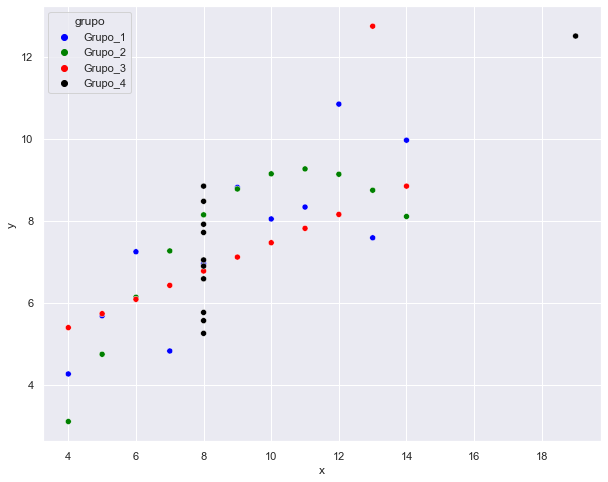

In [159]:
#grafico
sns.set(rc={'figure.figsize':(10,8)})

sns.scatterplot(
        x='x',
        y='y',
        data=df,
        hue='grupo',
        palette = ['blue', 'green', 'red','black']
    
)

In [160]:
print("Se puede apreciar que los grupos son muy diferentes entre si")

Se puede apreciar que los grupos son muy diferentes entre si


Pregunta 2:

In [161]:
# Grupo_1
df_1=df.loc[lambda x: x['grupo'] == 'Grupo_1']
print("Grupo 1")
df_1.describe()

Grupo 1


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [162]:
# Grupo_2
df_2=df.loc[lambda x: x['grupo'] == 'Grupo_2']
print("Grupo 2")
df_2.describe()

Grupo 2


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [163]:
# Grupo_3
df_3=df.loc[lambda x: x['grupo'] == 'Grupo_3']
print("Grupo 3")
df_3.describe()

Grupo 3


,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [164]:
# Grupo_4
df_4=df.loc[lambda x: x['grupo'] == 'Grupo_4']
print("Grupo 4")
df_4.describe()

Grupo 4


,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


In [165]:
print("De esto podemos ver claramente que tenemos distintos resultados para los 4, por lo cual son diferentes. Sin embargo claramente tienen los 4 el mismo promedio y desviación de las variables x , y ")

De esto podemos ver claramente que tenemos distintos resultados para los 4, por lo cual son diferentes. Sin embargo claramente tienen los 4 el mismo promedio y desviación de las variables x , y 


Pregunta 3:

In [166]:
x_range = np.arange(0,20,0.01)

In [167]:
# datos para la regresion lineal simple del Grupo 1
X_1 = df_1[['x']]
Y_1 = df_1['y']

# split dataset
X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size=0.2, random_state = 2) 

# ajustar el modelo
model_1 = LinearRegression() # Creando el modelo.
model_1.fit(X_1_train, Y_1_train) # ajustando el modelo

# prediciones
Y_predict_1 = model_1.predict(X_1_test)

Grafico refreción lineal grupo 1:


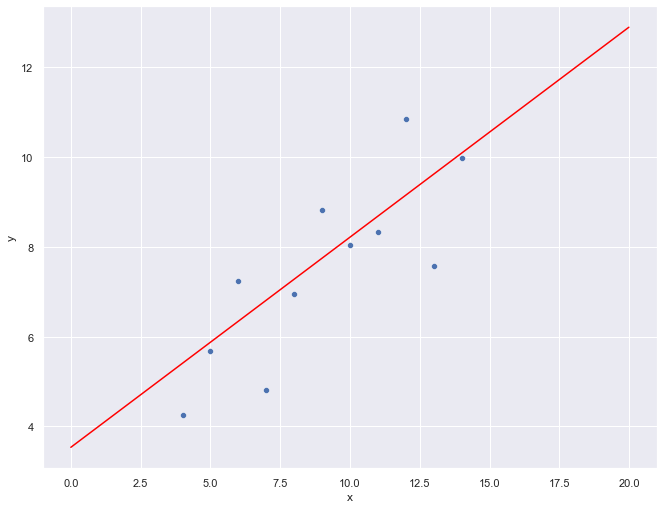

In [168]:
# graficos con seaborn para el grupo 1
        
beta_0_1 = model_1.intercept_
beta_1_1 = model_1.coef_[0]
        
df_plot_1 = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0_1 + beta_1_1*n for n in x_range]})
  
df_1 = pd.DataFrame({'x':X_1['x'],
                           'y_true':Y_1})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_1, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_1,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
print("Grafico refreción lineal grupo 1:")
plt.show()

In [169]:
# datos para la regresion lineal simple del Grupo 2
X_2 = df_2[['x']]
Y_2 = df_2['y']

# split dataset
X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size=0.2, random_state = 2) 

# ajustar el modelo
model_2 = LinearRegression() # Creando el modelo.
model_2.fit(X_2_train, Y_2_train) # ajustando el modelo

# prediciones
Y_predict_2 = model_2.predict(X_2_test)

Grafico refreción lineal grupo 2:


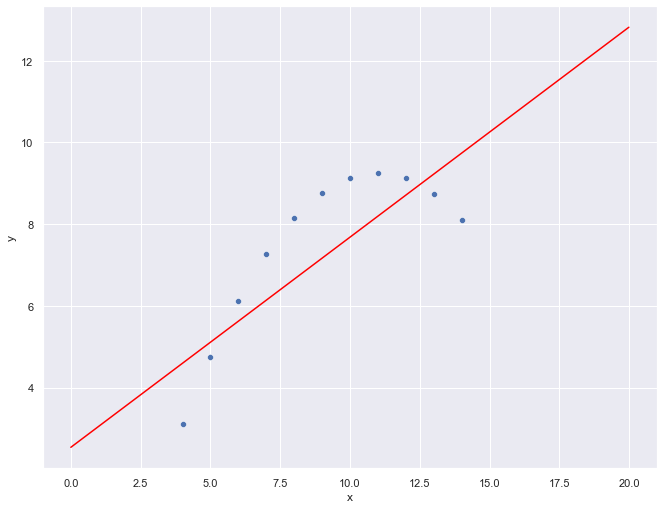

In [170]:
# graficos con seaborn para el grupo 2
        
beta_0_2 = model_2.intercept_
beta_1_2 = model_2.coef_[0]
        
df_plot_2 = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0_2 + beta_1_2*n for n in x_range]})
  
df_2 = pd.DataFrame({'x':X_2['x'],
                           'y_true':Y_2})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_2, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_2,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
print("Grafico refreción lineal grupo 2:")
plt.show()

In [171]:
# datos para la regresion lineal simple del Grupo 3
X_3 = df_3[['x']]
Y_3 = df_3['y']

# split dataset
X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, test_size=0.2, random_state = 2) 

# ajustar el modelo
model_3 = LinearRegression() # Creando el modelo.
model_3.fit(X_3_train, Y_3_train) # ajustando el modelo

# prediciones
Y_predict_3 = model_3.predict(X_3_test)

Grafico refreción lineal grupo 3:


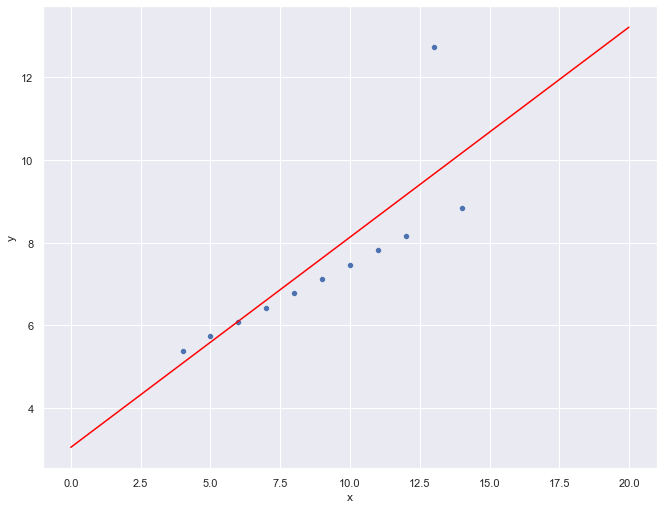

In [172]:
# graficos con seaborn para el grupo 3
        
beta_0_3 = model_3.intercept_
beta_1_3 = model_3.coef_[0]
        
df_plot_3 = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0_3 + beta_1_3*n for n in x_range]})
  
df_3 = pd.DataFrame({'x':X_3['x'],
                           'y_true':Y_3})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_3, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_3,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
print("Grafico refreción lineal grupo 3:")
plt.show()

In [173]:
# datos para la regresion lineal simple del Grupo 4
X_4 = df_4[['x']]
Y_4 = df_4['y']

# split dataset
X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, test_size=0.2, random_state = 2) 

# ajustar el modelo
model_4 = LinearRegression() # Creando el modelo.
model_4.fit(X_4_train, Y_4_train) # ajustando el modelo

# prediciones
Y_predict_4 = model_4.predict(X_4_test)

Grafico refreción lineal grupo 4:


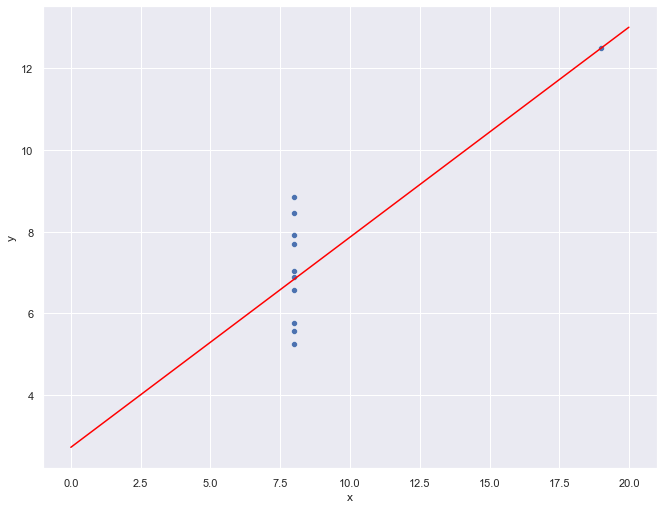

In [174]:
# graficos con seaborn para el grupo 4
        
beta_0_4 = model_4.intercept_
beta_1_4 = model_4.coef_[0]
        
df_plot_4 = pd.DataFrame({'x':x_range,
                        'y_true':[beta_0_4 + beta_1_4*n for n in x_range]})
  
df_4 = pd.DataFrame({'x':X_4['x'],
                           'y_true':Y_4})
        
fig, ax = plt.subplots(figsize=(11, 8.5))
        
        
sns.scatterplot(x='x', y='y_true', data=df_4, ax=ax)
sns.lineplot(x='x', y='y_true', data=df_plot_4,ax=ax,color="red")

plt.xlabel('x')
plt.ylabel('y')
print("Grafico refreción lineal grupo 4:")
plt.show()

In [175]:
print("De aca podemos notar que en el grupo 1 la regresión lineal parece ser correcta, mientras que en el grupo 2 no, ya que se aprecia un comportamiento claramente no lineal, en el grupo 3 pareciera que es correcta la regresión lineal aunque se detecta un outier que se deberia eliminar y finalmente en el grupo 4 la regresión da resultados muy malos.")

De aca podemos notar que en el grupo 1 la regresión lineal parece ser correcta, mientras que en el grupo 2 no, ya que se aprecia un comportamiento claramente no lineal, en el grupo 3 pareciera que es correcta la regresión lineal aunque se detecta un outier que se deberia eliminar y finalmente en el grupo 4 la regresión da resultados muy malos.


Pregunta 4:

In [176]:
#modelo grupo_1
df_temp_1 = pd.DataFrame(
    {
        'y':Y_1_test,
        'yhat': Y_predict_1
        }
)

df_metrics_1 = summary_metrics(df_temp_1)

df_metrics_1['modelo'] = 'Grupo_1'

#modelo grupo_2
df_temp_2 = pd.DataFrame(
    {
        'y':Y_2_test,
        'yhat': Y_predict_2
        }
)

df_metrics_2 = summary_metrics(df_temp_2)

df_metrics_2['modelo'] = 'Grupo_2'

#modelo grupo_3
df_temp_3 = pd.DataFrame(
    {
        'y':Y_3_test,
        'yhat': Y_predict_3
        }
)

df_metrics_3 = summary_metrics(df_temp_3)

df_metrics_3['modelo'] = 'Grupo_3'

#modelo grupo_4
df_temp_4 = pd.DataFrame(
    {
        'y':Y_4_test,
        'yhat': Y_predict_4
        }
)

df_metrics_4 = summary_metrics(df_temp_4)

df_metrics_4['modelo'] = 'Grupo_4'

#concatenar los modelos
print('\nMetricas para cada grupo:')
pd.concat([df_metrics_1,df_metrics_2,df_metrics_3,df_metrics_4])



Metricas para cada grupo:


,mae,mse,rmse,mape,maape,wmape,mmape,smape,modelo
0,0.8871,1.3933,1.1804,0.1670,0.1599,0.1324,0.1399,0.1429,Grupo_1
0,1.2246,1.5348,1.2389,0.1507,0.1495,0.1490,0.1341,0.1635,Grupo_2
0,0.4545,0.2815,0.5305,0.0622,0.0620,0.0649,0.0547,0.0598,Grupo_3
0,1.2605,1.6576,1.2875,0.1718,0.1700,0.1708,0.1507,0.1766,Grupo_4


In [177]:
print("De esto se aprecia que el grupo 3 es el que mejor se puede estimar con una regresión lineal simple.")

De esto se aprecia que el grupo 3 es el que mejor se puede estimar con una regresión lineal simple.


Pregunta 5:

In [178]:
print("En el grupo 1 vemos que la regresión es correcta.")

En el grupo 1 vemos que la regresión es correcta.


In [179]:
print("En el grupo 2 vemos que tiene un comportamiento no lineal, por lo cual un estimador cuadratico seria mejor.")

En el grupo 2 vemos que tiene un comportamiento no lineal, por lo cual un estimador cuadratico seria mejor.


In [180]:
print("En el grupo 3 vemos que la regresión lineal es la correcta pero se deberia elimina un outlier")

En el grupo 3 vemos que la regresión lineal es la correcta pero se deberia elimina un outlier


In [181]:
print("El grupo 4 no son datos que se puedan estimar linealmente.")

El grupo 4 no son datos que se puedan estimar linealmente.
